<a href="https://colab.research.google.com/github/sphuang28/Tibaml_11103/blob/main/10_19_%E9%9B%BB%E8%85%A6%E5%BD%B1%E5%83%8F%E6%95%B8%E6%93%9A%E8%99%95%E7%90%86_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


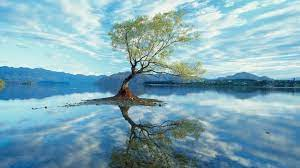

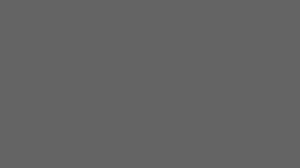

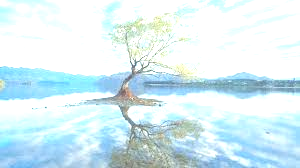

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image

#目的:調整亮度 

m1=cv2.imread("2.jpg",1)
m2=np.full(m1.shape,(100,100,100),np.uint8)#對象純色可以省略此行

#Add
m3=cv2.add(m1,m2)

#相減
#m3=cv2.subtract(m1,m2)

#負片效果(小於0-->絕對值運算)
#m3=cv2.absdiff(m1,(255,255,255,0))
#附上彩色圖片則需要透明值

cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)

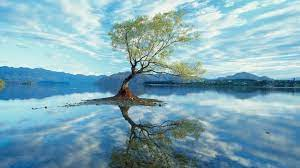

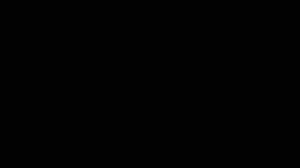

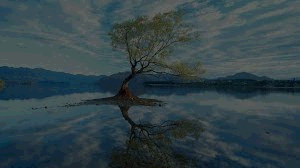

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image

m1=cv2.imread("2.jpg",1)
m2=np.full(m1.shape,(2,2,2),np.uint8)

#目的:混合使用色彩簡化(先除在乘)顏色壓縮提升處理效能增加空間


#圖像相除(未整除的會四捨五入)
m3=cv2.divide(m1,(25,25,25,0))

#圖像相乘
m3=cv2.multiply(m3,(10,10,10,0))

#各像素值在二進位表示下做not運算(快速色像相反)
#m3=cv2.bitwise_not(m1)

#補充numpy的矩陣變數-->應用場合,不在乎呈現效果要找出某個區域特定值
#除了使用函式外，numpy陣列也可以直接做運算果值低於0或者高於而若運算結255，則超過的部分會從另一端繼續計算
#m3=m1+300

cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)


In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image

m1=cv2.imread("2.jpg",1)
#m2=np.full(m1.shape,(2,2,2),np.uint8)

#目的:

#圖像縮放(未整除的會四捨五入)
#m3=cv2.resize(m1,新圖像大小(寬,高))

#等比例

# h=500
# w=int(m1.shape[1]/(m1.shape[0]/h))
# m3=cv2.resize(m1,(w,h))

#補充 img2 = cv2.resize(img, None, fx=0.5,fy=0.5)
# 因為dsize是必須要給的參數，None應該就是不設寬高值，直接透過比例調整圖片大小 
# fx=500
# fy=1000
# m3=cv2.resize(m1,None,fx=0.5,fy=0.5)


#圖像翻轉
#m3=cv2.flip(m3,(翻轉方式))1 左右翻轉 / 0 上下翻轉 / -1 左右與上下皆翻轉

#m3=cv2.flip(m1,-1)

#圖像旋轉
#m3=cv2.warpAffine(m3,變換矩陣,輸出的圖像大小)

#變換矩陣=cv2.getRotationMatrix2D(旋轉中心,角度,縮放比率)

#輸出的圖像大小=(寬,高)

#中心點取法
# cx=int(m1.shape[1]/2)
# cy=int(m1.shape[0]/2)
# m3=cv2.warpAffine(m1,
#          cv2.getRotationMatrix2D((cx,cy),45,0.5),
#          (m1.shape[1],m1.shape[0])        )

#不同角度旋轉
cx=int(m1.shape[1]/2)
cy=int(m1.shape[0]/2)
i=0
for i in range(0,180) :
  
  dp.clear_output(True)
  m3=cv2.warpAffine(m1,
          cv2.getRotationMatrix2D((cx,cy),i,0.5),
          (m1.shape[1],m1.shape[0])        )
  time.sleep(0.5)
  cv2_imshow(m3)

cv2_imshow(m1)
#cv2_imshow(m2)
#cv2_imshow(m3)



In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image

#區域裁切、複製和貼上(來源問題)
m1=cv2.imread("002.jpg",1)
m2=cv2.imread("1.jpg",1)
# m2=cv2.imread()

#這裡的 X 是 橫的左邊開始
#這裡的 Y 是 直的上面開始
m3=m1[100:200,450:650]

#m3=m1[:,100:100]
#m3=m1[:,:,3]

#取代部分區域
#m2[50:50,300:600]=m1[100:300,150:500]

#網狀結果
#m2[10:50:0,10:60:1]=m1[15:60:1,10:100:1]

#白平衡




cv2_imshow(m1)

cv2_imshow(m2)

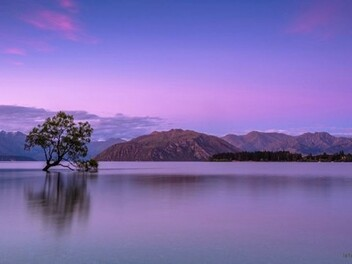

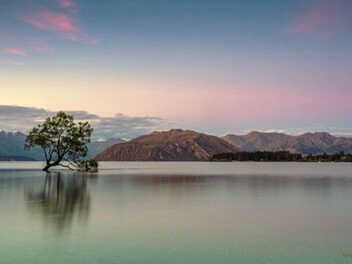

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image
#白平衡取平均 w圖像變數.mean()
m1=cv2.imread("002.jpg",1)

Bavg=m1[:,:,0].mean()
Gavg=m1[:,:,1].mean()
Ravg=m1[:,:,2].mean()
ColorAvg=Bavg+Gavg+Ravg

m2=m1.copy()
m2[:,:,0]=cv2.multiply(m1[:,:,0],(ColorAvg/(Bavg*3)))
m2[:,:,1]=cv2.multiply(m1[:,:,1],(ColorAvg/(Gavg*3)))
m2[:,:,2]=cv2.multiply(m1[:,:,2],(ColorAvg/(Ravg*3)))

cv2_imshow(m1)
cv2_imshow(m2)


In [ ]:
#作業:(BGR)
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image
#透過+/- 轉換
# m1=cv2.imread("h2.png",1)
# m2=np.full(m1.shape,(0,0,255),np.uint8)
# m3=cv2.subtract(m2,m1)
# m4=cv2.multiply(m3,(100,100,100,0))#黑字紅底
# m5=np.full(m1.shape,(255),np.uint8)
# m6=cv2.subtract(m5,m4)

m1=cv2.imread("h2.png",1)
m2=cv2.absdiff(m1,(255,255,0,0))#全部先255
m3=cv2.bitwise_not(m2)
m4=cv2.multiply(m3,(255,255,255,0)) #黑字白底+黃色雜訊<-----
m5=cv2.multiply(m4,(1,255,255,0)
# m5=cv2.bitwise_not(m4)#換藍色
# m6=cv2.subtract(m5,(255,0,0,0))#黑底黃字(1)
# m7=cv2.bitwise_not(m6)#白底藍字
# m8=cv2.add(m6,(255,255,255,0))#全黃
# m9=cv2.absdiff(m8,m6)



# # m5=cv2.multiply(m4,)#黑字紅底
# print(m6)
# print("====================")
# print(m7)
# # #cv2_imshow(m1)
# cv2_imshow(m2)
# cv2_imshow(m3)
cv2_imshow(m4)
cv2_imshow(m5)
# cv2_imshow(m6)
# cv2_imshow(m7)
# cv2_imshow(m8)
# cv2_imshow(m9)













#bitwise_not
#Add
#m3=cv2.add(m1,m2)

#相減
#m3=cv2.subtract(m1,m2)

#m4=cv2.subtract(m3,m2)
#負片效果(小於0-->絕對值運算)
#m3=cv2.absdiff(m1,(255,255,255,0))
#附上彩色圖片則需要透明值

#圖像相除(未整除的會四捨五入)
#m3=cv2.divide(m1,(25,25,25,0))

#圖像相乘
#m4=cv2.multiply(m3,(10,10,10,0))


SyntaxError: ignored

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image

m1=cv2.imread("002.jpg",1)

m2=m1.copy()

#二極化 -> 顏色簡化 -->所需主體與其他明顯區分
# th, m2[:,:,0]=cv2.threshold(m1[:,:,:], 60, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
# print(th)
# print(m2)

th, m2[:,:,0]=cv2.threshold(m1[:,:,0], 60, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
print(th)

th, m2[:,:,1]=cv2.threshold(m1[:,:,1], 60, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
print(th)

th, m2[:,:,2]=cv2.threshold(m1[:,:,2], 60, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
print(th)
print(m2)

cv2_imshow(m1)
cv2_imshow(m2)

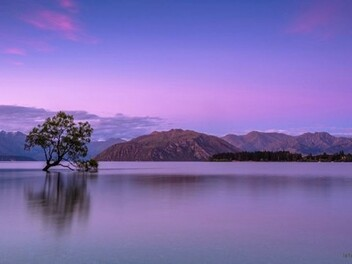

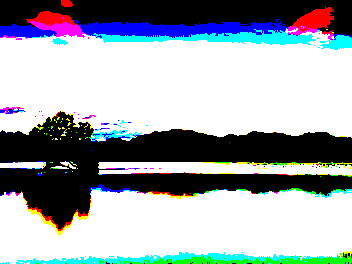

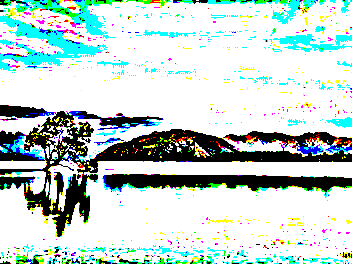

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image

m1=cv2.imread("002.jpg",1)

m2=m1.copy()
m3=m1.copy()
#結果圖像=cv2.adaptiveThreshold(圖像變數,最大值,方法一, 方法二,區塊大小,微調值(區塊大小不可為單數)
m2[:,:,0]=cv2.adaptiveThreshold(m1[:,:,0],255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY ,201,3)
m2[:,:,1]=cv2.adaptiveThreshold(m1[:,:,1],255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY ,201,3)
m2[:,:,2]=cv2.adaptiveThreshold(m1[:,:,2],255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY ,201,3)

m3[:,:,0]=cv2.adaptiveThreshold(m1[:,:,0],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY ,51,3)
m3[:,:,1]=cv2.adaptiveThreshold(m1[:,:,1],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY ,51,3)
m3[:,:,2]=cv2.adaptiveThreshold(m1[:,:,2],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY ,51,3)


cv2_imshow(m1)
cv2_imshow(m2)
cv2_imshow(m3)

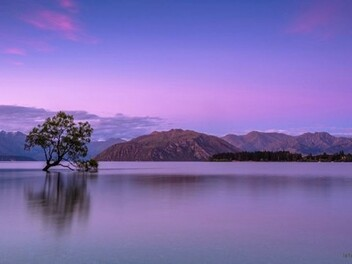

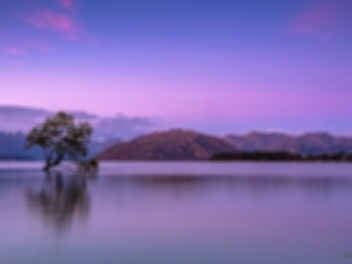

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image

m1=cv2.imread("002.jpg",1)

#影像邊緣偵測
#m2=cv2.Canny(m1,100,200)

#影像模糊化: 
#平均值模糊法(統計範圍內的色彩值平均)
m2=cv2.blur(m1,(5,5))

#中值模糊法
#m2=cv2.medianBlur(m1,31)

cv2_imshow(m1)
cv2_imshow(m2)




In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image

m1=cv2.imread("002.jpg",1)
m2=m1.copy()
#影像銳利化 直方圖均衡化法：

m2[:,:,0]=cv2.equalizeHist(m1[:,:,0])
m2[:,:,1]=cv2.equalizeHist(m1[:,:,1])
m2[:,:,2]=cv2.equalizeHist(m1[:,:,2])

cv2_imshow(m1)
cv2_imshow(m2)

In [ ]:
!apt install tesseract-ocr
!pip install pytesseract

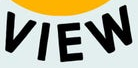

VIE



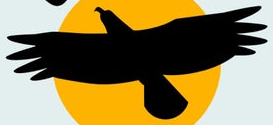

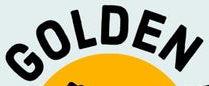

golLdey



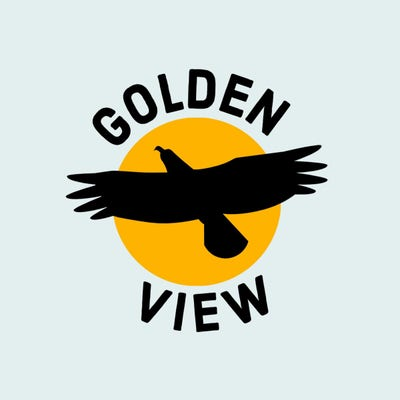

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image
import pytesseract as pt

#文字辨識

m1=cv2.imread("3.jpg",1)

m2=cv2.inRange(m1,(0,0,0),(30,30,30))
m2=cv2.dilate(m2,np.ones((13,13)))
m3=cv2.inRange(m1,(0,0,0),(30,30,30))

p,t=cv2.findContours(m2,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)


for i in range(0,len(p),1):
  x, y, w, h, =cv2.boundingRect(p[i])
  #cv2.rectangle(m1,(x,y),(x+w,y+h), (0,0,255), 2)
  cv2_imshow(m1[y:y+h,x:x+w])
  d=pt.image_to_string(m1[y:y+h,x:x+w],"eng")
  print(d)

cv2_imshow(m1)
# cv2_imshow(m2)
# cv2_imshow(m3)

In [ ]:
!python training.py

請輸入這個新語言包的名稱：myfont
請輸入要學習的圖檔名稱：myfont.png
Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
請先確認myfont.box檔案內容是否正確在按Enter鍵
Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
APPLY_BOXES:
   Boxes read from boxfile:      12
   Found 12 good blobs.
Generated training data for 4 words
Extracting unicharset from box file myfont.box
Wrote unicharset file unicharset
Reading myfont.tr ...
Building master shape table
Computing shape distances...
Stopped with 0 merged, min dist 999.000000
Computing shape distances...
Stopped with 0 merged, min dist 999.000000
Computing shape distances...
Stopped with 0 merged, min dist 999.000000
Computing shape distances... 0
Stopped with 0 merged, min dist 999.000000
Computing shape distances... 0
Stopped with 0 merged, min dist 999.000000
Computing shape distances... 0
Stopped with 0 merged, min dist 999.000000
Computing shape distances...
Stopped with 0 merged, min dist 999.000000
Computing shape distances...
Stopped with 0 merged, m

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image
import pytesseract as pt

#文字辨識

m1=cv2.imread("myfont.png",1)
d=pt.image_to_string(m1,"myfont")

print(d)
cv2_imshow(m1)
# cv2_imshow(m3)

In [ ]:
!apt install libzbar-dev
!pip install pyzbar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop
  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common
  libcairo-script-interpreter2 libcairo2-dev libcupsfilters1 libcupsimage2
  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 liblcms2-dev liblqr-1-0
  liblqr-1-0-dev libmagick++-6-headers libmagick++-6.q16-7
  libmagick++-6.q16-dev libmagick++-dev libmagickcore-6-arch-config
  libmagickcore-6-headers libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickcore-6.q16-dev libmagickwand-6-headers libmagickwand-6.q16-3
  libmagickwand-6.q16-dev libpixman-1-dev librsvg2-dev libv4l-0 libv4lconvert0
  li

QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/


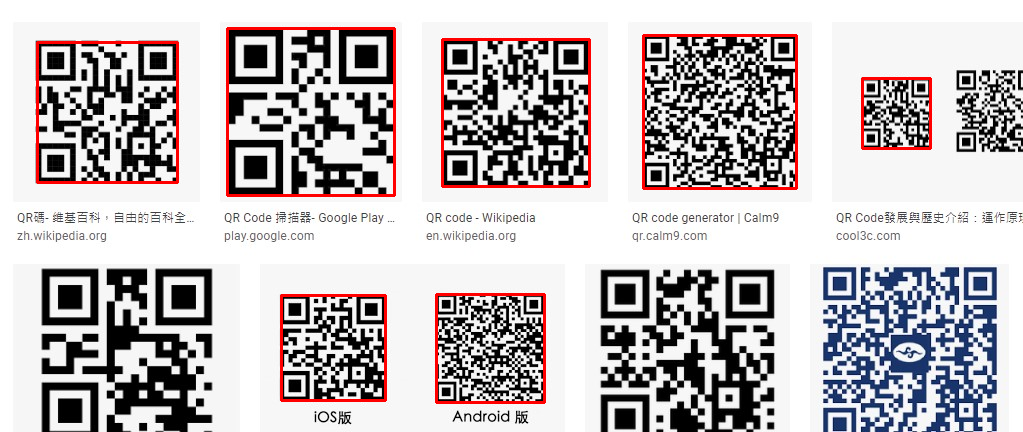

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image
import pytesseract as pt
from pyzbar import pyzbar
#條碼偵測

# 結果變數 = pyzbar . decode類型，每個索引值指向一個條碼結果變數(圖像變數)

# m1=cv2.imread("p1.png",1)
# data=pyzbar.decode(m1)
# print(data[0].type)
# print(data[0].rect)
# print(data[0].data)

# try:
#   print(data[0].data.decode("utf-8").encode("sjis").decode("utf-8"))
# except:
#   print(data[0].data.decode("utf-8"))

#多個輸出

m1=cv2.imread("p3.jpg",1)
data=pyzbar.decode(m1)
for i in range(0,len(data)):
  print(data[i].type)
  x, y, w, h,=data[i].rect
  cv2.rectangle(m1, (x,y),  (x+w,y+h),  (0,0,255),  2)
  try:
    print(data[0].data.decode("utf-8").encode("sjis").decode("utf-8"))
  except:
    print(data[0].data.decode("utf-8"))
  print("=================================================================")


cv2_imshow(m1)
# cv2_imshow(m3)

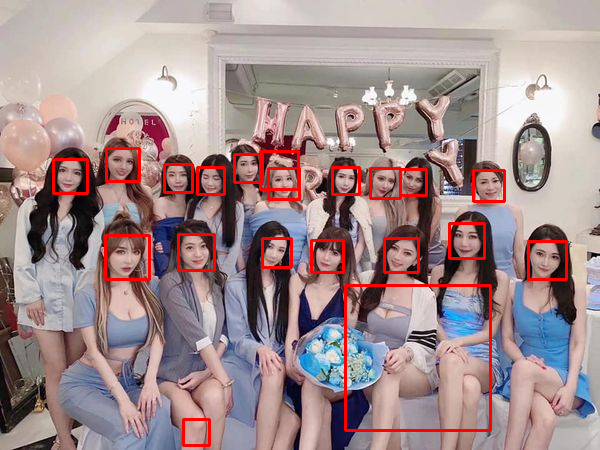

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image
import pytesseract as pt
from pyzbar import pyzbar

#辨識

m1=cv2.imread("t1.jpg",1)

p1=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
data=p1.detectMultiScale(m1,minNeighbors=1,minSize=(10,10))
for x,y,w,h in data:
  cv2.rectangle(m1, (x,y),  (x+w,y+h),  (0,0,255),  2)

cv2_imshow(m1)

In [ ]:
!unzip classifier_training_colab.zip
!python classifier_training_colab/training.py

Archive:  classifier_training_colab.zip
   creating: classifier_training_colab/
   creating: classifier_training_colab/Data/
  inflating: classifier_training_colab/Data/Image.jpg  
   creating: classifier_training_colab/NEG/
  inflating: classifier_training_colab/NEG/00000.png  
  inflating: classifier_training_colab/NEG/00001.png  
  inflating: classifier_training_colab/NEG/00002.png  
  inflating: classifier_training_colab/NEG/00003.png  
  inflating: classifier_training_colab/NEG/00004.png  
  inflating: classifier_training_colab/NEG/00005.png  
  inflating: classifier_training_colab/NEG/00006.png  
  inflating: classifier_training_colab/NEG/00007.png  
  inflating: classifier_training_colab/NEG/00008.png  
  inflating: classifier_training_colab/NEG/00009.png  
  inflating: classifier_training_colab/NEG/00010.png  
  inflating: classifier_training_colab/NEG/00011.png  
  inflating: classifier_training_colab/NEG/00012.png  
  inflating: classifier_training_colab/NEG/00013.png  
  inf

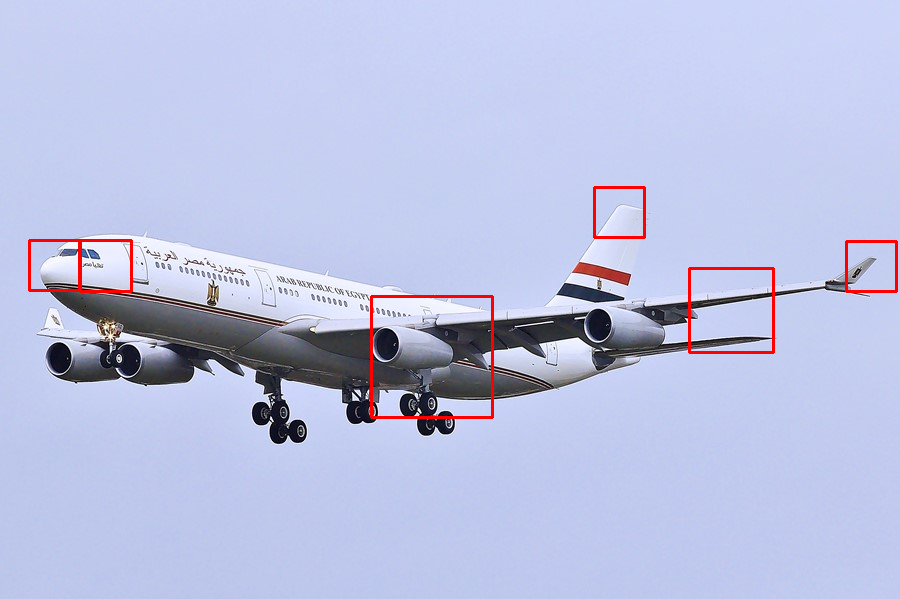

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont,ImageDraw, Image
from pyzbar import pyzbar
#import pytesseract as pt


#辨識格式都用png

m1=cv2.imread("classifier_training_colab/Data/Image.jpg",1)

p1=cv2.CascadeClassifier("classifier_training_colab/xml/cascade.xml")
data=p1.detectMultiScale(m1,minNeighbors=1,minSize=(10,10))
for x,y,w,h in data:
  cv2.rectangle(m1, (x,y),  (x+w,y+h),  (0,0,255),  2)

cv2_imshow(m1)